In [2]:
import pandas as pd
import numpy as np

Ya que estoy trabajando en Jupyther de forma local, modifico el código para obtener los datos y almacenarlos en el dataframe.

In [7]:
import requests
import os 
from PIL import Image
from IPython.display import IFrame

In [10]:
filename='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [12]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**Analizando patrones de características individuales utilizando visualización**

Importamos seaborn y matplotlib

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**¿Cómo escoger el método de visualización adecuado?**

Cuando se visualizan variables individuales, es importante entender primero que tipo de variable se está enfrentando. Esto nos ayudará a encontrar el método correcto de visualización para esa variable.


In [14]:
#enlista los tipos de datos para cada variable
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


**Pregunta 1**
**¿Cuál es el tipo de dato de "peak-rpm"?**

In [16]:
df['peak-rpm'].dtypes

dtype('float64')

Podemos calcular a correlación entre dos variables del tipo "int64" o "float64" utilizando el método ".corr":

In [17]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Los elementos diagonales son siempre uno; vamos a estudiar la correlación, específicamente la correlación de Pearson en profundidad al final de esta libreta.


**Pregunta 2**

**Encuentra la correlación entre las siguientes columas: bore, stroke, compression-ratio y horsepower.**

Tip: Si quisieras seleccionar estas columnas, utiliza la siguiente sintaxis:
df[['bore','stroke','compression-ratio','horsepower]]

In [18]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


**Variables numéricas continuas:**

Las variables numéricas contínuas son variables que pueden contener cualquier valor dentro de un rango. Pueden ser del tipo "int64" o "float64". Una gran forma para visualizar estas variables es utilizando gráficos de dispersión (scatterplots) con lineas ajustadas.

Para comenzar a entender la relación (linear) entre una variable individual y el precio, podemos utilizar "regplot" el cual grafica el gráfico de dispersión con la línea de regresión ajustada para los datos.

Vamos a ver varios ejemplos de diferentes relaciones lineales:

**Relación Lineal positiva**

Vamos a encontrar el gráfico de dispersiónde "engine-size y "price".

(0.0, 53286.13520081228)

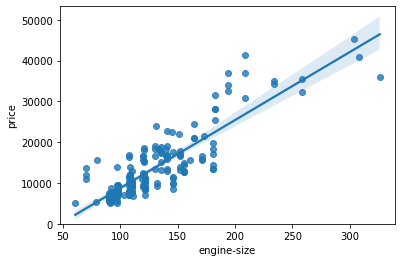

In [19]:
# Engine size como una variable de predicción potencial del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Como el tamaño del motor amenta, el precio aumenta: Esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un predictor bastante bueno del precio, ya que la linea regresión es casi una linea diagonal perfecta.

Podemos analizar la correlación entre 'engine-size' y 'price' y ver que es aproximadamente 0.87.

In [20]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Millas por galón en autopista es un predictor potencial de la variable precio. Vamos a encontrar el gráfico de dispersión de "highway-mpg" y "price".



<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

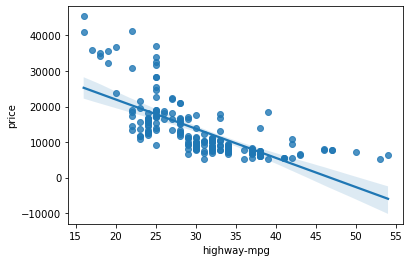

In [21]:
sns.regplot(x="highway-mpg", y="price", data=df)

Como las millas por galón en autopista aumentan, el precio disminuye: Esto indica una relación inversa/ng¿egativa entre estas dos variables. Las millas por galón en autopista pudieran potencialmente ser un predictor del precio.

Podemos analizar la correlación entre 'highway-mpg' y 'price' y ver que es aproximadamente -0.704.

In [22]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


**Relación lineal débil**

Vamos a ver si "peak-rpm" es u predictor de la variable "price".

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

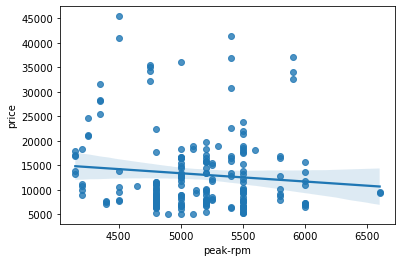

In [23]:
sns.regplot(x="peak-rpm", y="price", data=df)

Revoluciones por minuto pico no parece ser un buen predictor del precio para nada, ya que la linea de regresión es cercana a horizontal. También los puntos de datos están muy dispersos y lejos de la línea ajustada, mostrango mucha variabilidad. Por lo tanto, no es una variable confiable.

Podemos examinar la correlación entre 'peak-rpm' y 'price' y ver que es aproximadamente -0.101616.

In [24]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


**Pregunta 3 a)**

Encuentra la correlación entre x = "stroke" y y="price".

Tip: Si quisieras seleccionar esas columnas, utliza la siguiente sintaxis: df[["stroke","price"]].

In [25]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


**Pregunta 3 b)**

Dados los resultados de correlación entre "price" y "stroke", esperas una relación lineal?

Verifica tus resultados utilizando la función "regplot()"

Hay una correlación débil entre la variable 'stroke' y 'price'. Y dicha regresión no funcionará adecuadamente. Podemos ver esto utilizando el gráfico de dispersión para demostrarlo.

<AxesSubplot:xlabel='stroke', ylabel='price'>

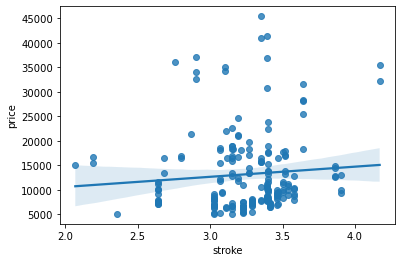

In [26]:
sns.regplot(x="stroke", y="price", data=df)

**Variables categóricas**

Estas variables describen una característica de una unidad de datos, y son seleccionadas de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo  "object" o "int64". Un buen método de visualizar las variables categóricas es utilizando gráficos de caja.

Vamos a ver la relación entre "body-style" y "price".

<AxesSubplot:xlabel='body-style', ylabel='price'>

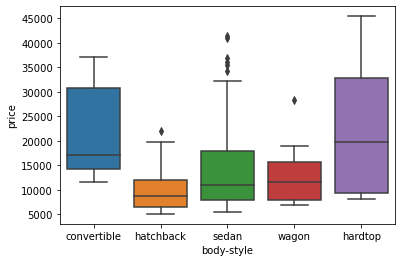

In [27]:
sns.boxplot(x="body-style", y="price", data=df)

Podemos ver que la distribución del precio entre las diferentes categorías de estilo de cuerpo tiene una superposición significativa, entonces "body-style" no sería un buen predictor del precio. Vamos a analizar "engine-location" y "price":

<AxesSubplot:xlabel='engine-location', ylabel='price'>

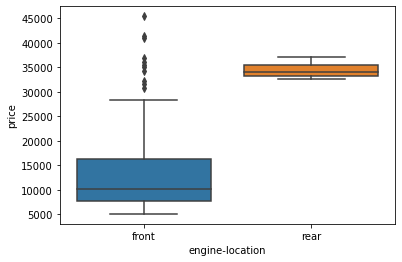

In [28]:
sns.boxplot(x="engine-location", y="price", data=df)

Aqui podemos ver que la distribución del precio entre estas dos categorías de ubicaciones de motor, frontal y traseram son diferentes suficientes para que la ubicación del motor sea un buen predictor potencial del precio.

Vamos a analizar "drive-wheels" y "price".

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

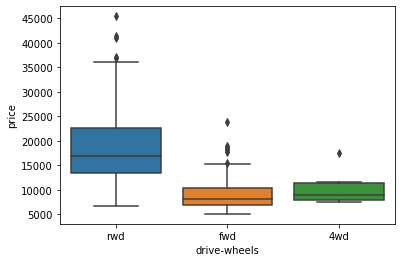

In [29]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Aquí encontramos que la distribución del precio entre las diferentes categorías de "drive-wheels" difiere. Como tal, drive-wheels puera ser potencialmente un predictor del precio.

###**3. Análisis estadístico Descriptivo**

Vamos a revisar las variables utilizando un método de descripción.

La función de descripción automáticamente computa estadística básica para todas las variables contínuas. Cualquier valor NaN automáticamente se ignora en estas estadísticas.

Esto va a mostrar:

* El conteo de la variable
* El promedio
* El valor mínimo
* La desviación estándard (std)
* El IQR (Rango intercuartil: 25%, 50% y 75%)
* El valor máximo

Podemos aplicar el método "describe" como sigue:

In [30]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


La configuración por default de "describe" ignora variables del tipo objeto. Podemos aplicar el método "describe" en las variables de tipo 'object' como sigue:

In [31]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


**Conteo de valores**

El conteo de valores es una buena forma de entender cuántas unidades de cada característica/varieble tenemos. Podemos aplicar el método "value_counts" en la columna "drive-wheels". No olvides que el método "value_counts" sólo funciona en series pandas, no en dataframes pandas. Como resultado, solo incluimos un corchete df['drive-wheels'], no dos corchetes df[['drive-wheels']].

In [32]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir series en dataframes de la siguiente forma:

In [33]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Vamos a repetir los pasos anteriores, pero guardemos los resultados en el dataframe "drive_wheels_counts" cambiemos el nombre de la columna 'drive-wheels' a 'value_counts'.

In [34]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Ahora vamos a cambiar el nombre del índice a 'drive-wheels':

In [35]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir el proceso anterior para la variable 'engine-location'.

In [36]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Después de analizar los valores de conteo de la ubicación del motor, podemos ver que la ubicación de motor no sería una buena variable predictora del precio. Esto es porque sólo tenemos tres carros con un motor trasero y 198 con un motor en el frente, y este resultado está sesgado. Por lo que no podemos llegar a conclusiones acerca de la localización del motor.

**4. Bases de Agrupamiento**

El método "groupby" agrupa datos por diferetes categorías, Los datos son agrupados basados en una o varias variables, y se analizan en los grupos individuales.

Por ejemplo, vamos a agrupar por la variable "drive-wheels". Veremos que hay 3 grupos diferentes de drive-wheels.

In [37]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Si queremos saber en promedio cuál tipo de tracción es la más valiosa, podemos agrupar drive-wheels" y luego promediarlas.

Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price', luego asignarlas a la variable  "df_group_one".

In [38]:
df_group_one = df[['drive-wheels','body-style','price']]

Ahora podemos calcular el precio promedio por cada tipo de categoría de datos.

In [39]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


De nuestros datos, parece que los vehículos de tracción trasera son en promedio los más caros, mientras los de tracción en las 4 ruedas y tracción trasera son aproximadamente del mismo precio.

También podemos agrupar por múltiples variables. Por ejemplo, vamos a agrupar por ambos'drive-wheels' y 'body-style'. Estos grupos en el dataframe por la combinación única de 'drive-wheels' y 'body-style'. Podemos almacenar los resultados en la variable 'grouped_test1'.

In [40]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Estos datos agrupados son mucho más fácilmente visualizados cuando se realiza en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el dataframe en una tabla dinámica utilizando el método "pivot" para crear una tabla dinámica desde los grupos.

En este caso, vamos a dejar la variable de drive-wheels como las filas de la tabla y pivot body-style que sea las columnas de la tabla:

In [41]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Frecuentemente no tenemos datos para algunas de las celdas pivot. Podemos llenar esas celdas faltantes con el valor 0, pero cualquier otro valor pudiera ser potencialmente usado también. Debe ser mencionado que los datos faltantes son un tema complejo unico y que es un curso entero en si mismo.

In [43]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**Pregunta4**

Utiliza la función "groupby" para encontrar el precio primedio para cada carro basad en "body-style".

In [44]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Variables: Drive Wheels and Body Style vs. Price**

Vamos a utilizar un mapa de calor para visualizar la relación entre Body Style vs Price.

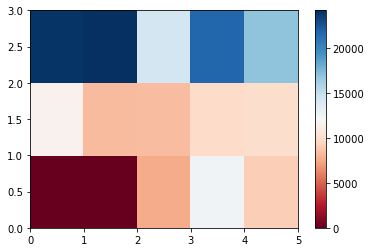

In [46]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

El mapa de calor grafica la variable objetivo (precio) proporcional al color con respecto a las variables 'drive-wheel' y 'body-style' en los ejes vertical y horizontal respectivamente. Esto nos permite visualizar como el precio se relaciona con 'drive-wheel' y 'body-style'.

Las etiquetas por default no nos dan información útil. Vamos a cambiarlas:

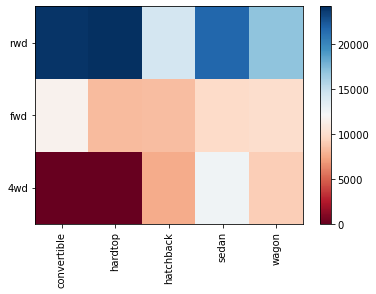

In [47]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#nombres de etiquetas
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#mueve puntos y etiquetas el centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#inserta etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rota las etiquetas si son muy largas
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Puthon poporcionan gran libertad. Vamos a ir a más profundidad en un curso de visualizaciones en Python por separado.

La pregunta principal que queremos contestar en este módulo es, ¿Cuáles son las características principales que tienen el mayor impacto en el precio del carro?

Para tener una mejor medida de las características importantes, veremos la correlación de estas variables con el precio dle carro. En otras palabras: ¿Cómo es dependiente el precio del carro de esta variable?

**Correlación y causalidad**

Correlación: Medida de extension de la interdependencia entre variables.

Causalidad: La relación entre la causa y efecto de dos variables.

Es importante saber las diferencias entre estas dos. Las correlaciones no implican causalidad. Determinar la correlación es mucho más simple que determinar la causalidad ya que la causalidad puede requerir experimentación independiente.

**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X y Y.

El coeficiente resultante es un valor entre -1 y 1 de forma inclusiva, donde:

1: Correlación perfecta lineal positiva

0: Correlación no lineal, las dos variables es muy probable que no se afecten entre sí.

-1: Correlación perfecta lineal negativa

La correlación de Pearson es el método por default de la unfión "corr". Como antes, podemos calcular la correlación de Pearson de variables 'int64' o 'float64'.

In [48]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


A veces quisieramos saber que tan significativo es el estimado de correlación.

**P-value**

¿Qué es P-value? El P-value es el valor probabilístico estadísticamente significativo entre estas dos variables. Normalmente, escogemos un nivel de significancia de 0.05, que significa que estamos 95% confidentes que la correlación entre las variables es significativa.

Por convención cuando:

* p-value es  <0.001: decimos que hay evidencia fuerte que la correlación es significativa.
* p-value es  <0.05: hay moderada evidencia que la correlación es significativa.
* p-value es  <0.1: hay débil evidencia que la correlación es significativa.
* p-value es   >0.1: No hay evidencia que la correlación es significativa.

Podemos obtener esta información utilizando el módulo "stats" de la libería "Scipy".

In [49]:
from scipy import stats

**Wheel-Base vs. Price**

Vamos a calcular el coeficiente de correlación de Pearson y P-value de 'wheel-base' y 'price'.

In [51]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un P-value de P =", p_value)  

El coeficiente de correlación de Pearson es 0.584641822265508  con un P-value de P = 8.076488270733218e-20


**Conclusión:**

Dado que el p-value es <0.001, la correlación entre wheel-base y price es estadísticamente  significativa, aunque la relación lineal no es extremadamente fuerte. (~0.585).

**Horsepower vs. Price**

Vamos a calcular el coeficiente de correlación de Pearson y P-value de 'horsepower' y 'price'.

In [52]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


In [53]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


In [54]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


In [55]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893816e-53


In [56]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455186  with a P-value of P = 9.265491622197335e-64


In [57]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


In [58]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


In [59]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

In [60]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [61]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [63]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [65]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [66]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [67]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [68]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666
